In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('heart.csv')

In [6]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
df.shape

(918, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


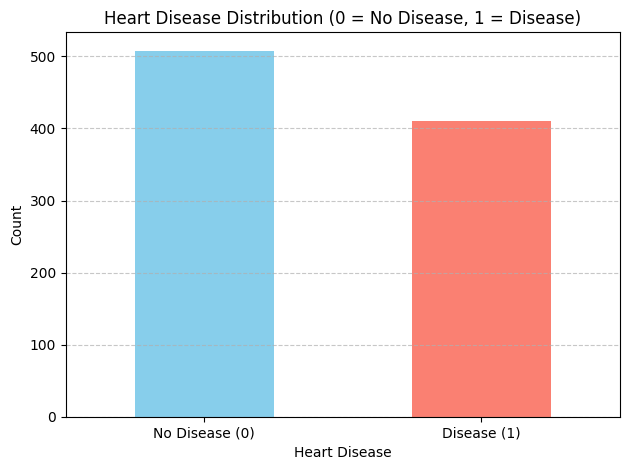

In [11]:
import matplotlib.pyplot as plt

# Plot bar chart
df['HeartDisease'].value_counts().plot(kind="bar", color=['skyblue', 'salmon'])

# Add titles and labels
plt.title("Heart Disease Distribution (0 = No Disease, 1 = Disease)")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Disease (0)', 'Disease (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

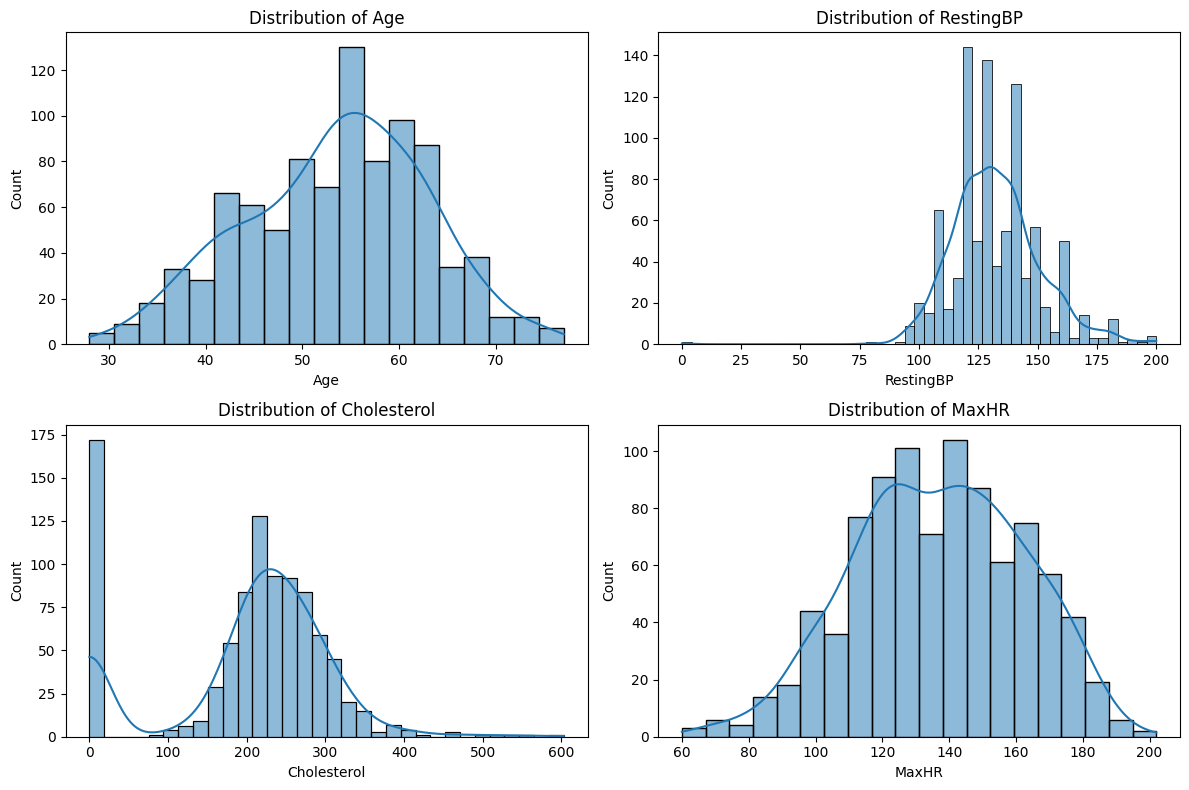

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))  # Set overall figure size

def plotting(var, num):
    plt.subplot(2, 2, num)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)

plt.tight_layout()
plt.show()


In [14]:
# Calculate mean cholesterol excluding zeros (likely missing or invalid values)
ch_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()

# Replace zeros with the calculated mean
df['Cholesterol'] = df['Cholesterol'].replace(0, ch_mean)

# Round the cholesterol values to 2 decimal places
df['Cholesterol'] = df['Cholesterol'].round(2)

In [15]:
resting_bp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()
df['RestingBP'] = df['RestingBP'].replace(0, resting_bp_mean)
df['RestingBP'] = df['RestingBP'].round(2)

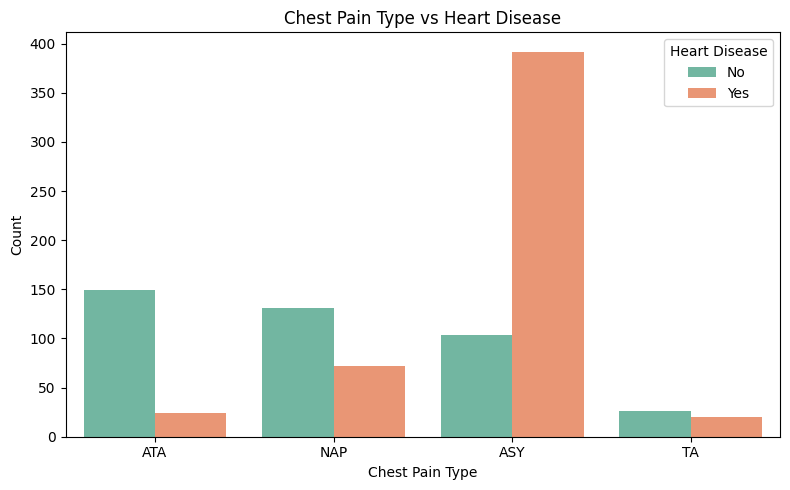

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='Set2')

plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

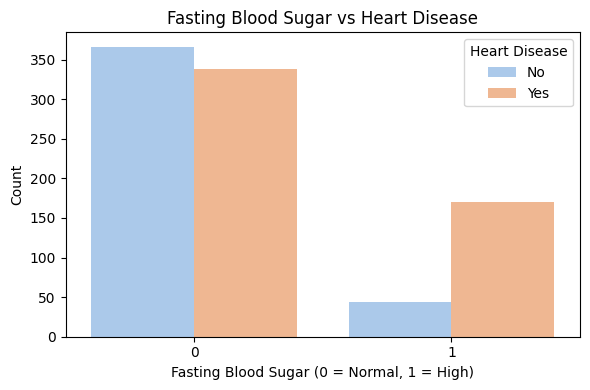

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='FastingBS', hue='HeartDisease', data=df, palette='pastel')

plt.title('Fasting Blood Sugar vs Heart Disease')
plt.xlabel('Fasting Blood Sugar (0 = Normal, 1 = High)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

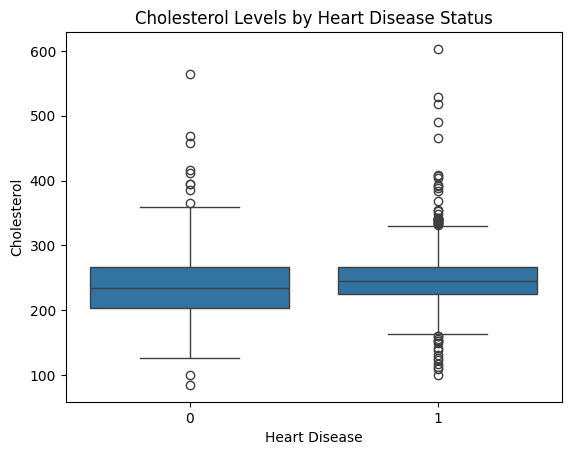

In [18]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title("Cholesterol Levels by Heart Disease Status")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol")
plt.show()

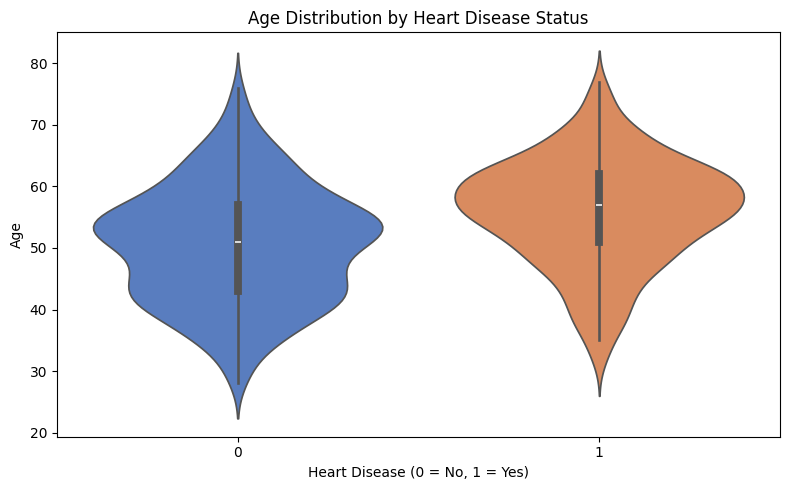

In [19]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='HeartDisease', y='Age', data=df, palette='muted')

plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

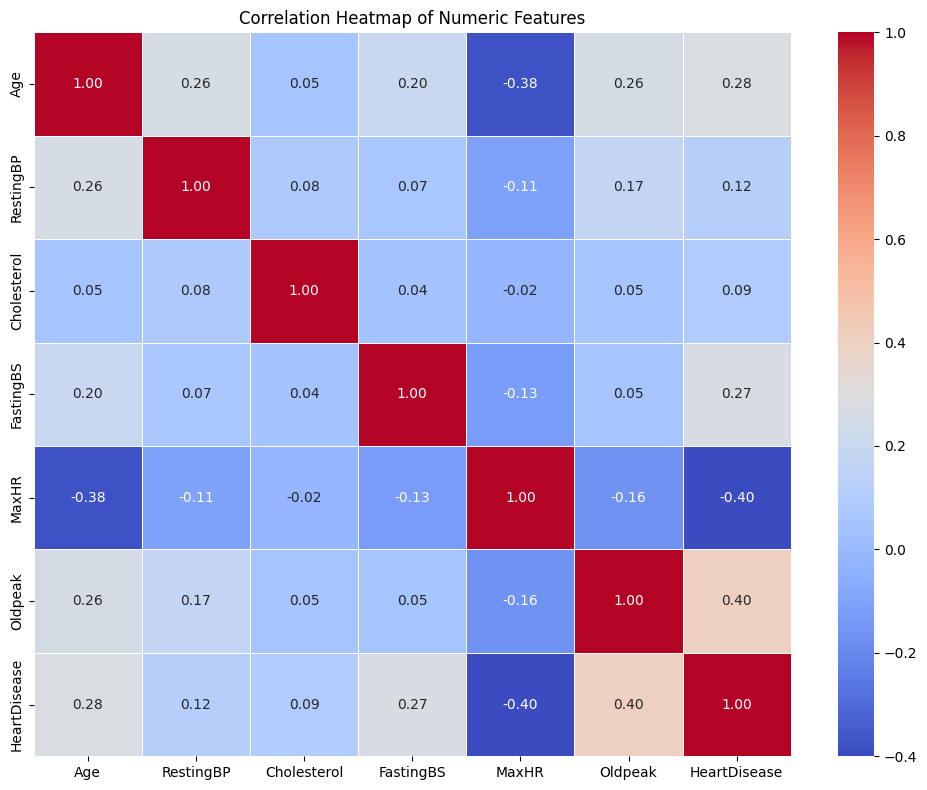

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

# Data Preprocessing and Cleaning

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
df_encode = pd.get_dummies(df, drop_first=True)

In [23]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [24]:
scaler = StandardScaler()
df_encode[numerical_cols] = scaler.fit_transform(df_encode[numerical_cols])

In [25]:
dummy_cols = [col for col in df_encode.columns if col not in numerical_cols]
df_encode[dummy_cols] = df_encode[dummy_cols].astype(int)

In [26]:
print(df_encode.dtypes)

Age                  float64
RestingBP            float64
Cholesterol          float64
FastingBS              int64
MaxHR                float64
Oldpeak              float64
HeartDisease           int64
Sex_M                  int64
ChestPainType_ATA      int64
ChestPainType_NAP      int64
ChestPainType_TA       int64
RestingECG_Normal      int64
RestingECG_ST          int64
ExerciseAngina_Y       int64
ST_Slope_Flat          int64
ST_Slope_Up            int64
dtype: object


In [27]:
print(df_encode.columns)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import joblib
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True)  # Optional: for predict_proba
}

In [32]:
# Split first
X = df_encode.drop('HeartDisease', axis=1)  # example target column name
y = df_encode['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit scaler on training data only
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform test data using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [35]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1 Score': round(f1, 4)
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  F1 Score
0  Logistic Regression    0.8641    0.8792
1                  KNN    0.8533    0.8732
2          Naive Bayes    0.8478    0.8614
3        Decision Tree    0.8207    0.8421
4                  SVM    0.8370    0.8585


In [37]:
from sklearn.linear_model import LogisticRegression
import joblib

# Assuming X_train, y_train, scaler, and X are already defined

# Step 1: Define and train the best model
best_model = LogisticRegression()
best_model.fit(X_train, y_train)

# Step 2: Save model, scaler, and column names
joblib.dump(best_model, 'LogisticRegression_heart.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'col.pkl')

print("✅ Logistic Regression model, scaler, and column list saved successfully.")



✅ Logistic Regression model, scaler, and column list saved successfully.
